In [2]:
import pandas as pd
bikes = pd.read_pickle('https://github.com/rogovich/Data/blob/master/data/BikesDataVars.pkl?raw=true')

In [20]:
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [15]:
bikes['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [16]:
bikes['Good weather'].value_counts()

0    7948
1     812
Name: Good weather, dtype: int64

In [17]:
bikes['Temperature'].value_counts()

 23.4    39
 19.1    38
 20.5    38
 20.7    37
 24.2    37
         ..
-14.7     1
 37.9     1
-12.6     1
 37.5     1
-14.5     1
Name: Temperature, Length: 545, dtype: int64

In [1]:
bikes['Temperature'].hist(bins = 5) # bins - корзинки

NameError: name 'bikes' is not defined

In [21]:
bikes.groupby('Date')['Rental Count'].sum()

Date
2017-12-01     9802
2017-12-02     8404
2017-12-03     8644
2017-12-04     9556
2017-12-05     6578
              ...  
2018-11-26    13934
2018-11-27    13964
2018-11-28    17378
2018-11-29    18058
2018-11-30    17543
Name: Rental Count, Length: 365, dtype: int64

In [23]:
bikes.groupby('Date')['Rental Count'].median()

Date
2017-12-01    326.5
2017-12-02    250.0
2017-12-03    268.5
2017-12-04    334.5
2017-12-05    222.5
              ...  
2018-11-26    449.5
2018-11-27    641.0
2018-11-28    637.5
2018-11-29    576.5
2018-11-30    679.0
Name: Rental Count, Length: 365, dtype: float64

In [25]:
bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum()

Seasons  Date      
Autumn   2018-09-01    25495
         2018-09-02    33943
         2018-09-03    10753
         2018-09-04    31363
         2018-09-05    34816
                       ...  
Winter   2018-02-24     6286
         2018-02-25     5780
         2018-02-26     9133
         2018-02-27     8923
         2018-02-28     3663
Name: Rental Count, Length: 365, dtype: int64

<AxesSubplot:>

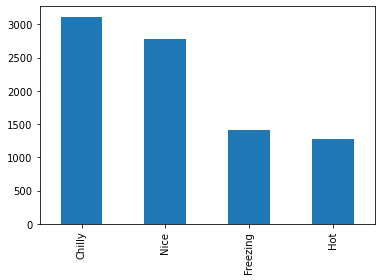

In [6]:
bikes['Temperature Category'].value_counts().plot(kind='bar')

In [7]:
# bikes.groupby('Temperature Category').size().sort_values(ascending=False)
bikes.groupby('Temperature Category').size()

Temperature Category
Chilly      3112
Freezing    1412
Hot         1279
Nice        2778
dtype: int64

In [33]:
bikes['Temperature Category'].value_counts()

Chilly      3112
Nice        2778
Freezing    1412
Hot         1279
Name: Temperature Category, dtype: int64

<AxesSubplot:xlabel='Seasons'>

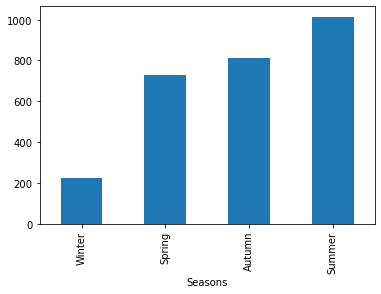

In [37]:
# chain syntax - "цепочечный синтаксис"
bikes.groupby('Seasons')['Rental Count'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Seasons,Temperature Category'>

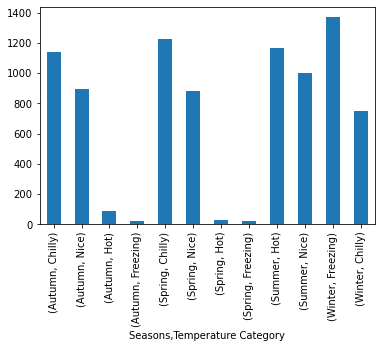

In [43]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().plot(kind='bar')

In [9]:
# pivot table
bikes.groupby('Seasons')['Temperature Category'].value_counts().unstack()

Temperature Category,Chilly,Freezing,Hot,Nice
Seasons,,,,
Autumn,1138.0,20.0,86.0,894.0
Spring,1224.0,22.0,27.0,881.0
Summer,NaN,NaN,1166.0,1003.0
Winter,750.0,1370.0,NaN,NaN


<AxesSubplot:xlabel='Seasons'>

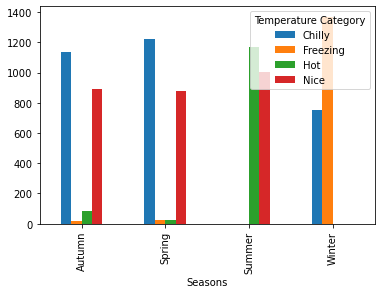

In [47]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='Seasons'>

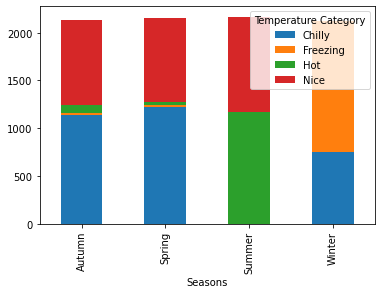

In [48]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().unstack().plot(kind='bar', stacked=True)

In [49]:
# long table
bikes.groupby('Seasons')['Temperature Category'].value_counts().unstack()

Temperature Category,Chilly,Freezing,Hot,Nice
Seasons,,,,
Autumn,1138.0,20.0,86.0,894.0
Spring,1224.0,22.0,27.0,881.0
Summer,NaN,NaN,1166.0,1003.0
Winter,750.0,1370.0,NaN,NaN


In [53]:
bikes['Temperature Category'].value_counts()

Chilly      3112
Nice        2778
Freezing    1412
Hot         1279
Name: Temperature Category, dtype: int64

In [55]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8581 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   int64         
 9   Functioning Day       8760 non-null   bool          
 10  Rental Count          8760 non-null   int64         
 11  Normal Humidity       8760 non-null   int64         
 12  Temperature Category  8581 non-null   category      
 13  Good weather      

In [62]:
bikes['Temperature'].describe()

count    8581.000000
mean       12.878557
std        11.955551
min       -17.800000
25%         3.400000
50%        13.700000
75%        22.500000
max        39.400000
Name: Temperature, dtype: float64

* mean — среднее арифметическое
* std — standard deviation — среднеквадратичное отклонение

In [64]:
bikes[['Temperature']].describe()

,Temperature
count,8581.000000
mean,12.878557
std,11.955551
min,-17.800000
25%,3.400000
50%,13.700000
75%,22.500000
max,39.400000


In [78]:
bikes['Temperature Category'].mode()

0    Chilly
Name: Temperature Category, dtype: category
Categories (4, object): ['Chilly', 'Freezing', 'Hot', 'Nice']

In [72]:
import numpy as np
bikes['Temperature'].quantile(0.75) - bikes['Temperature'].quantile(0.25)

19.1

In [85]:
def var_range(x):
    return x.max() - x.min()

In [104]:
bikes_descr = bikes.groupby('Hour')[['Temperature', 'Rental Count']].agg(func=['mean', 'median', var_range, 'sum'])

In [105]:
bikes_descr

Temperature                          Rental Count                   \
            mean median var_range     sum         mean median var_range   
Hour                                                                      
0      11.253652  11.80      48.0  4006.3   558.178082    433      2059   
1      10.972145  11.50      47.8  3939.0   415.720548    329      1485   
2      10.542535  10.90      47.5  3742.6   319.767123    239      1950   
3      10.355462  10.70      47.2  3696.9   201.010959    165       781   
4      10.069859  10.40      47.5  3574.8   122.838356     94       608   
5       9.849580  10.00      47.6  3516.3   135.863014    107       561   
6       9.763944  10.00      47.9  3466.2   283.654795    193      1577   
7       9.454062   9.60      48.0  3375.1   612.646575    410      2880   
8       9.988515  10.40      49.6  3565.9   979.838356    762      4438   
9      11.459669  12.10      50.5  4148.4   642.136986    519      2318   
10     12.766947  14.00      50.9  4557.8   519.123288    414      1740   
11     14.285434  16.40      51.4  5099.9   585.336986    485      2041   
12     15.417175  17.40      51.2  5565.6   710.534247    572      2239   
13     16.184765  18.30      51.2  5842.7   700.706849    586      2805   
14     16.862360  19.10      50.8  6003.0   747.147945    567      3163   
15     17.084358  19.20      50.7  6116.2   796.084932    678      3194   
16     16.821652  18.80      50.6  5904.4   938.032877    804      3671   
17     16.325281  18.40      50.8  5811.8  1128.873973    899      4450   
18     15.255956  16.80      50.8  5507.4  1518.983562   1154      6012   
19     14.254062  15.20      49.9  5088.7  1168.328767    845      5418   
20     13.394460  14.10      48.8  4835.4  1069.698630    721      3857   
21     12.680165  13.40      48.0  4602.9   997.942466    688      4373   
22     12.281461  12.95      48.1  4372.2   893.621918    649      3432   
23     11.717416  12.25      48.1  4171.4   671.898630    516      2603   

              
         sum  
Hour          
0     203735  
1     151738  
2     116715  
3      73369  
4      44836  
5      49590  
6     103534  
7     223616  
8     357641  
9     234380  
10    189480  
11    213648  
12    259345  
13    255758  
14    272709  
15    290571  
16    342382  
17    412039  
18    554429  
19    426440  
20    390440  
21    364249  
22    326172  
23    245243

In [100]:
bikes.pivot_table(index = 'Hour',
                  values = ['Rental Count', 'Temperature'],
                  aggfunc = ['std', 'median', var_range])

std                   median                var_range  \
     Rental Count Temperature Rental Count Temperature Rental Count   
Hour                                                                  
0      455.016192   11.437803          433       11.80         2059   
1      338.058896   11.391632          329       11.50         1485   
2      268.797389   11.411300          239       10.90         1950   
3      162.601701   11.306762          165       10.70          781   
4      106.375778   11.284178           94       10.40          608   
5      113.191916   11.310231          107       10.00          561   
6      273.636723   11.323973          193       10.00         1577   
7      582.515881   11.487845          410        9.60         2880   
8      871.005983   11.931827          762       10.40         4438   
9      500.018849   12.199029          519       12.10         2318   
10     415.278139   12.148809          414       14.00         1740   
11     452.773454   12.038602          485       16.40         2041   
12     538.838247   11.929531          572       17.40         2239   
13     539.252891   11.833386          586       18.30         2805   
14     613.267340   11.825084          567       19.10         3163   
15     631.989742   11.872539          678       19.20         3194   
16     744.642450   11.798065          804       18.80         3671   
17     935.173622   12.080028          899       18.40         4450   
18    1286.770715   12.154047         1154       16.80         6012   
19    1088.371072   11.847401          845       15.20         5418   
20     995.999725   11.656540          721       14.10         3857   
21     916.900635   11.480006          688       13.40         4373   
22     787.161188   11.480268          649       12.95         3432   
23     581.424225   11.345552          516       12.25         2603   

                  
     Temperature  
Hour              
0           48.0  
1           47.8  
2           47.5  
3           47.2  
4           47.5  
5           47.6  
6           47.9  
7           48.0  
8           49.6  
9           50.5  
10          50.9  
11          51.4  
12          51.2  
13          51.2  
14          50.8  
15          50.7  
16          50.6  
17          50.8  
18          50.8  
19          49.9  
20          48.8  
21          48.0  
22          48.1  
23          48.1

In [117]:
ts = bikes['Rental Count'].mean() + bikes['Rental Count'].std() * 2

In [118]:
bikes[bikes['Rental Count'] >= ts]['Hour'].value_counts()

18    100
19     66
17     54
20     52
21     44
8      42
16     29
22     24
15     11
14     10
13      8
23      5
7       4
12      2
9       1
Name: Hour, dtype: int64

In [115]:
bikes['Rental Count'].mean() - bikes['Rental Count'].std() * 3

-1552.8557617222968

<AxesSubplot:>

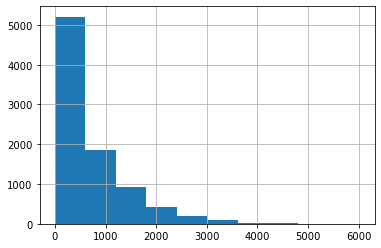

In [116]:
bikes['Rental Count'].hist()

In [119]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8581 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   int64         
 9   Functioning Day       8760 non-null   bool          
 10  Rental Count          8760 non-null   int64         
 11  Normal Humidity       8760 non-null   int64         
 12  Temperature Category  8581 non-null   category      
 13  Good weather      

In [120]:
# imputation, импутация данных, заполнение пропущенных значений
bikes.groupby('Seasons')['Temperature'].mean()

Seasons
Autumn    14.138821
Spring    13.038533
Summer    26.574827
Winter    -2.567783
Name: Temperature, dtype: float64

In [121]:
bikes[bikes['Temperature'].isna()]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good weather
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,0,True,688,1,NaN,0
50,2017-12-03,2,NaN,79,1.4,0.0,0.0,Winter,0,True,262,0,NaN,0
64,2017-12-03,16,NaN,77,1.6,0.0,0.0,Winter,0,True,577,0,NaN,0
105,2017-12-05,9,NaN,31,1.3,0.0,0.0,Winter,0,True,313,0,NaN,0
151,2017-12-07,7,NaN,93,0.5,0.0,0.9,Winter,0,True,269,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8669,2018-11-27,5,NaN,84,0.6,0.0,0.0,Autumn,0,True,176,0,NaN,0
8679,2018-11-27,15,NaN,70,2.1,0.0,0.0,Autumn,0,True,670,0,NaN,0
8710,2018-11-28,22,NaN,34,1.3,0.0,0.0,Autumn,0,True,1034,0,NaN,0
8717,2018-11-29,5,NaN,34,0.9,0.0,0.0,Autumn,0,True,30,0,NaN,0


In [127]:
bikes_without_na = bikes.dropna(subset=['Temperature'], axis=0)

In [141]:
bikes['Temp_temp'] = bikes['Temperature'].fillna(bikes['Temperature'].mean())

In [142]:
bikes[bikes['Temperature'].isna()].head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good weather,Temp_temp
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,0,True,688,1,NaN,0,12.878557
50,2017-12-03,2,NaN,79,1.4,0.0,0.0,Winter,0,True,262,0,NaN,0,12.878557
64,2017-12-03,16,NaN,77,1.6,0.0,0.0,Winter,0,True,577,0,NaN,0,12.878557
105,2017-12-05,9,NaN,31,1.3,0.0,0.0,Winter,0,True,313,0,NaN,0,12.878557
151,2017-12-07,7,NaN,93,0.5,0.0,0.9,Winter,0,True,269,0,NaN,0,12.878557
